<a href="https://colab.research.google.com/github/avicennamumtaza/courses-computervision/blob/main/module5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import glob

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def gamma_correction(image, gamma):
    # Normalize the image pixel values to the range [0, 1]
    normalized_img = image / 255.0
    corrected_img = 255 * (normalized_img ** (1 / gamma))
    return np.uint8(corrected_img)

Masukkan nilai Gamma: 3
Gamma Correction pada citra
----------------------------------
Gamma: 3.0


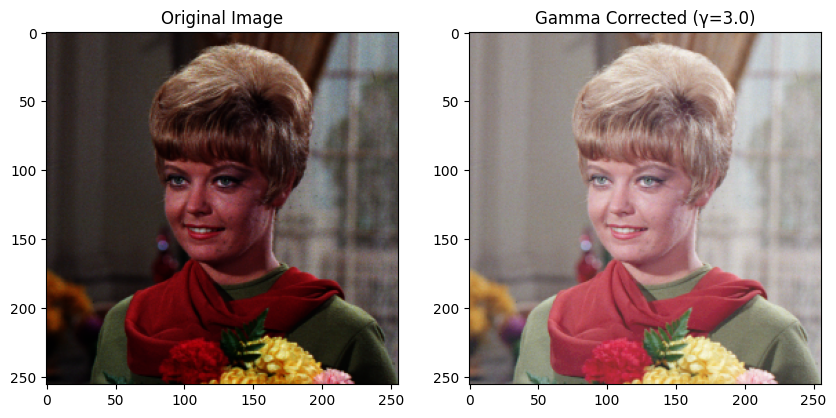

In [ ]:
try:
  original= cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/female.tiff'), cv.COLOR_BGR2RGB)
  # plt.imshow(original)
  # Input gamma value from user
  gamma = float(input('Masukkan nilai Gamma: '))

  print('Gamma Correction pada citra')
  print('----------------------------------')
  print(f'Gamma: {gamma}')

  # Perform gamma correction
  gamma_corrected_image = gamma_correction(original, gamma)
  # plt.imshow(gamma_corrected_image)
  # Display the original and corrected images side by side
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(original)
  plt.title("Original Image")

  plt.subplot(1, 2, 2)
  plt.imshow(gamma_corrected_image)
  plt.title(f"Gamma Corrected (γ={gamma})")

  plt.show()
  # print(gamma)
except ValueError:
  print('Error, not a number')

In [ ]:
def bit_depther(image, levels):
    # Scale the image intensities to the new range and back
    normalized_img = np.floor(image / levels) * levels
    return np.uint8(normalized_img)

85.0


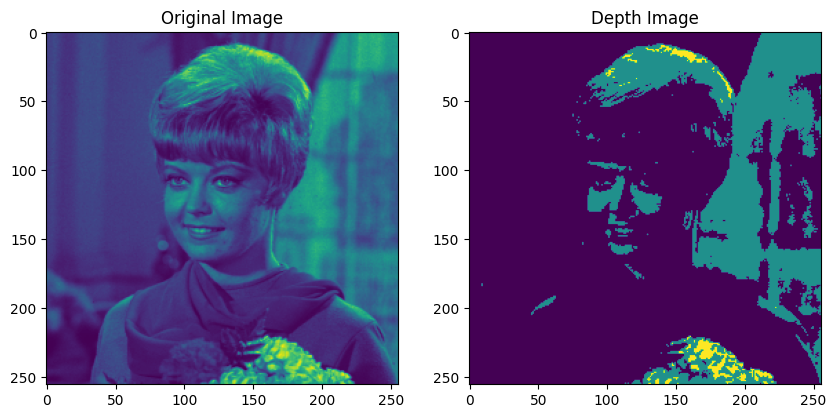

In [ ]:
try:
  bit_depth = 2
  level = 255 / (pow(2,bit_depth)-1)
  print(level)
  original = cv.cvtColor(cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/female.tiff'), cv.COLOR_BGR2RGB), cv.COLOR_RGB2GRAY)
  depth_image = bit_depther(original, level)

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(original)
  plt.title("Original Image")

  plt.subplot(1, 2, 2)
  plt.imshow(depth_image)
  plt.title(f"Depth Image")
except ValueError:
  print('Error, not a number')

In [ ]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

In [ ]:
cv_img = []
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

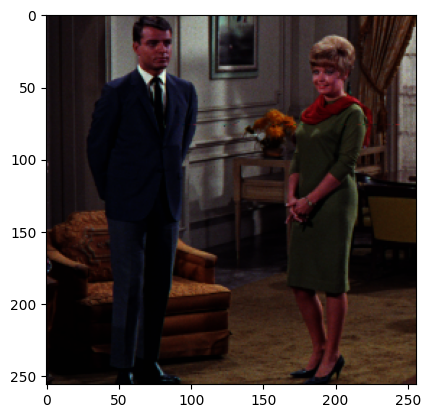

In [ ]:
original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/couple.tiff'), cv.COLOR_BGR2RGB)
plt.imshow(original)

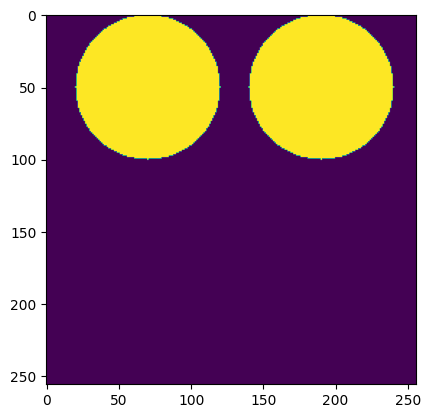

In [ ]:
blank = np.zeros(original.shape[:2], dtype='uint8')
maskCirc = cv.circle(blank, (70,50), 50, 255, -1)
maskCirc = cv.circle(blank, (190,50), 50, 255, -1)
plt.imshow(maskCirc)

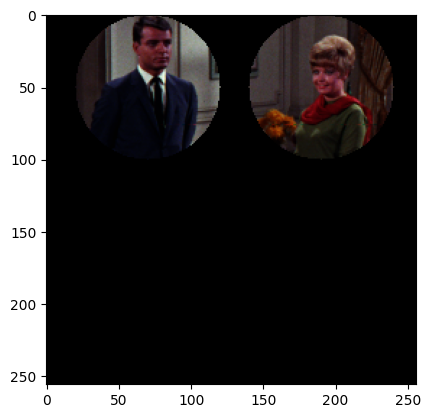

In [ ]:
circAnd = cv.bitwise_and(original, original, mask=maskCirc)
plt.imshow(circAnd)

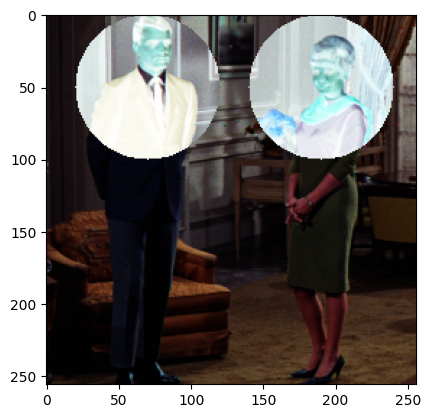

In [ ]:
circNot = cv.bitwise_not(original, original, mask=maskCirc)
plt.imshow(circNot)

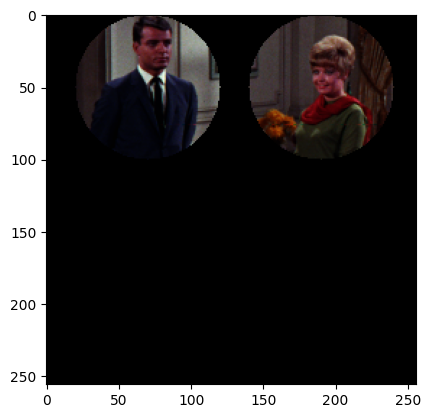

In [ ]:
circOr = cv.bitwise_or(original, original, mask=maskCirc)
plt.imshow(circOr)

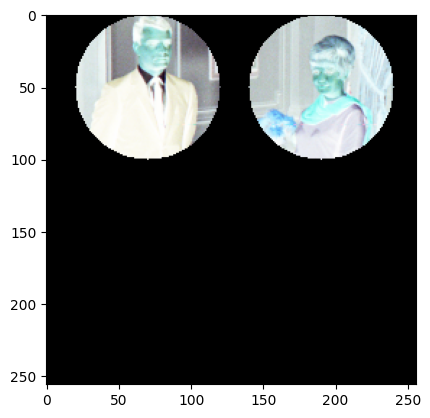

In [ ]:
circNand = cv.bitwise_not(cv.bitwise_and(original, original, mask=maskCirc), cv.bitwise_and(original, original, mask=maskCirc), mask=maskCirc)
plt.imshow(circNand)

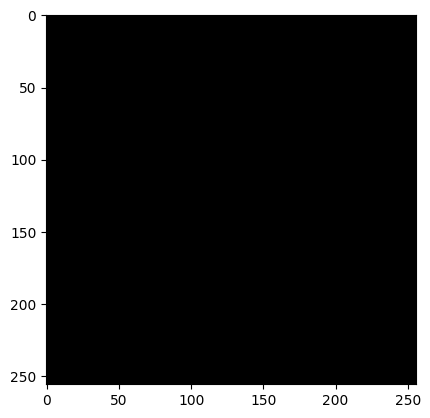

In [ ]:
circXor = cv.bitwise_xor(original, original, mask=maskCirc)
plt.imshow(circXor)